In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from statesim.generate.input import generate_random_static_input
import numpy as np
from statesim.simulator import ContinuousSimulator
from statesim.model.statespace import Nonlinear
from statesim.system.cartpole import CartPole
from statesim.system.inverted_pendulum import InvertedPendulum
from statesim.system.coupled_msd import CoupledMsd
from statesim.analysis.plot_simulation_results import (
    plot_states,
    plot_inputs,
    plot_outputs,
)

In [19]:
T = 20
eta = 0.01
N = int(T / eta)
us = generate_random_static_input(
    N=N, nu=1, amplitude_range=(-10.0, 10.0), frequency_range=(50, 100)
)
us = [np.array([[u]]) for u in np.zeros(N)]

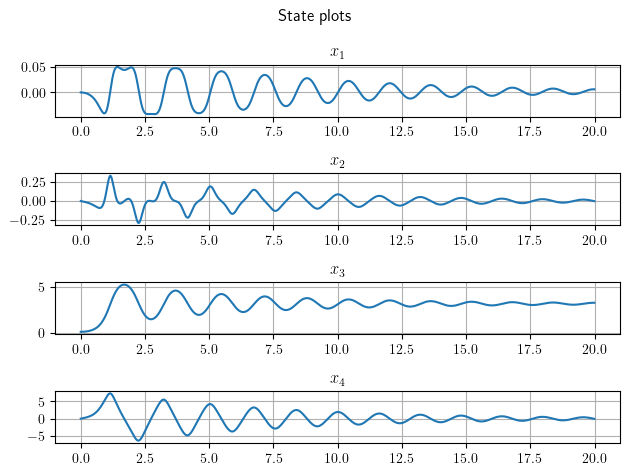

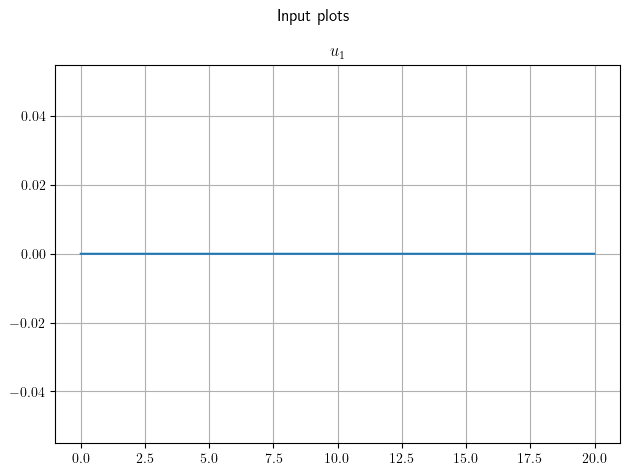

In [20]:
sys = CartPole(mu_p=0.01)
model = Nonlinear(
    f=sys.state_dynamics,
    g=sys.output_function,
    nx=sys.nx,
    nu=sys.nu,
    ny=sys.ny,
)
sim = ContinuousSimulator(T=T, step_size=eta)
result, _ = sim.simulate(
    model=model,
    initial_state=np.array([[0], [0], [0.1], [0]]),
    input=us,
    name='nl cartpole random static input',
)
plot_states(result=result)
plot_inputs(result=result)

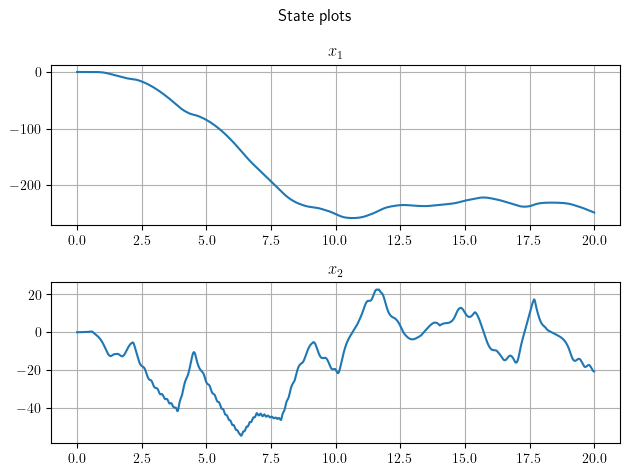

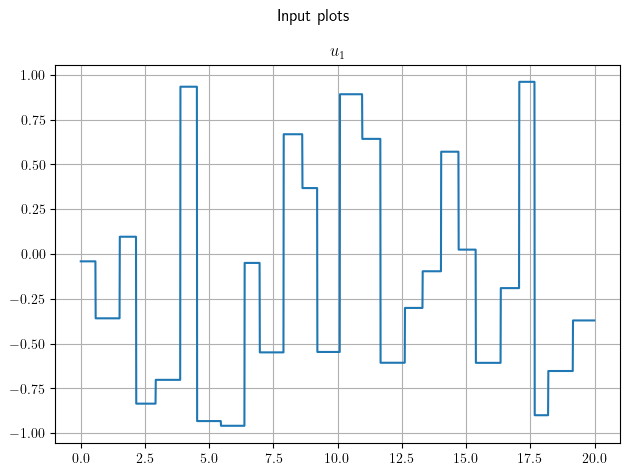

In [22]:
us = generate_random_static_input(
    N=N, nu=1, amplitude_range=(-1, 1), frequency_range=(50, 100)
)
# us = [np.array([[u]]) for u in np.zeros(N)]

sys = InvertedPendulum(mu_p=0.01)
model = Nonlinear(
    f=sys.state_dynamics,
    g=sys.output_function,
    nx=sys.nx,
    nu=sys.nu,
    ny=sys.ny,
)
sim = ContinuousSimulator(T=T, step_size=eta)
result, _ = sim.simulate(
    model=model,
    initial_state=np.array([[0.1], [0]]),
    input=us,
    name='nl cartpole random static input',
)
plot_states(result=result)
plot_inputs(result=result)

/Users/jack/Documents/python_venv/statesim/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  func(*args, **kwargs)
/Users/jack/Documents/python_venv/statesim/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


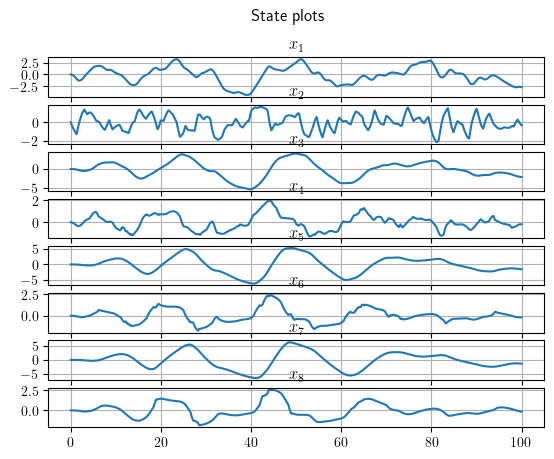

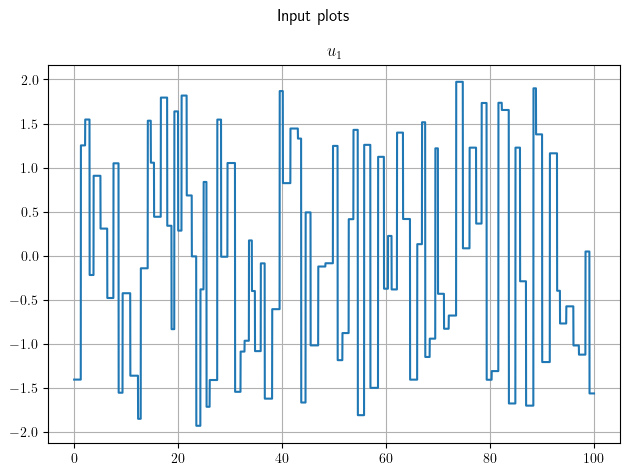

In [17]:
T = 100
eta = 0.01
N = int(T / eta)
us = generate_random_static_input(
    N=N, nu=1, amplitude_range=(-2, 2), frequency_range=(50, 150)
)
# us = [np.array([[u]]) for u in np.zeros(N)]
sys = CoupledMsd()
model = Nonlinear(
    f=sys.state_dynamics,
    g=sys.output_function,
    nx=sys.nx,
    nu=sys.nu,
    ny=sys.ny,
)
sim = ContinuousSimulator(T=T, step_size=eta)
result, _ = sim.simulate(
    model=model,
    initial_state=np.zeros(shape=(4 * 2, 1)),
    input=us,
)
plot_states(result=result)
plot_inputs(result=result)